# 5^2

The goal of our metric was to find the easiet neighborhood to jaywalk in. To do this, we anaylzed data from three sets; Traffic Count Data, Speed Humps, and City Traffic Signs. The traffic counts are used to see car frequency and speed, and the other two sets are used to show how 'controlled' those cars are.

We had debated using pedestrian/car collisions to see where people get hit most, but of the million columns, there was no neighborhood one. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
traf=pd.read_csv("traffic.csv")##   ye ol' imports

In [17]:
traf.drop(labels=['id','device_id','record_oid','count_start_date',
                'count_end_date','max_speed','speed95_percent',
                'speed85_percent','counter_type','counter_number',
                'council_district','average_daily_bike_traffic',
                'ward','tract','public_works_division','pli_division',
                'police_zone','fire_zone'], axis=1,inplace= True)
traf.dropna(subset=['average_daily_car_traffic'],
          inplace=True)##purging columns and NaN values
col = traf.pop('neighborhood')
traf.set_index(col, inplace=True)##moving neighborhood column to index
traf.head()

,average_daily_car_traffic,speed_limit,median_speed,percent_over_limit,longitude,latitude
neighborhood,,,,,,
Polish Hill,4949.0,25.0,29.0,77.0,-79.967772,40.455733
Squirrel Hill South,2741.0,25.0,28.0,70.0,-79.914335,40.437379
Central Northside,1046.0,25.0,19.0,2.0,-80.014234,40.458106
Polish Hill,3015.0,25.0,26.0,58.0,-79.964592,40.457119
Squirrel Hill South,5592.0,25.0,28.0,70.0,-79.911925,40.435620


In [18]:
mtraf = traf.groupby(level='neighborhood').mean()
mtraf['Score']=mtraf.average_daily_car_traffic * mtraf.median_speed/1000
mtraf.sort_values(['average_daily_car_traffic'], inplace=True)
with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision',1):
    print(mtraf[['average_daily_car_traffic','median_speed','Score']])

                           average_daily_car_traffic  median_speed  Score
neighborhood                                                             
South Side Flats                               115.0          18.0    2.1
Lincoln Place                                  126.0          20.0    2.5
Lincoln-Lemington-Belmar                       195.0          20.0    3.9
Fineview                                       419.0          25.0   10.5
Allegheny West                                 477.0          20.0    9.5
New Homestead                                  666.0          24.0   16.0
Overbrook                                      777.0          26.0   20.2
Summer Hill                                    937.0          26.0   24.4
Upper Hill                                     953.3          22.8   21.7
Central Northside                             1189.0          20.0   23.8
Spring Garden                                 1226.0          29.0   35.6
Hazelwood                             

TypeError: 'Figure' object is not callable

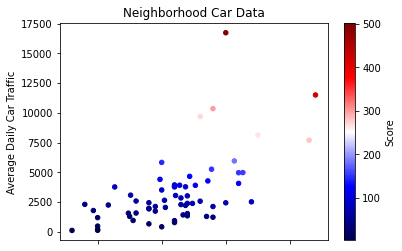

In [26]:
dotplot= mtraf.plot.scatter(x='median_speed',
                            y='average_daily_car_traffic',
                            c='Score',
                            colormap='seismic')
dotplot.set_title('Neighborhood Car Data')
dotplot.set_xlabel('Median Speed(MPH)')
dotplot.set_ylabel('Average Daily Car Traffic')
dotplot.figure()
dotplot.plot()